In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('C:/Users/ghaou/Downloads/archive (5).zip')

# Visualisation de nos données

# Exploring Categories

In [6]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [8]:
df.shape

(962, 2)

In [9]:
category_counts = df['Category'].value_counts()
category_counts

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

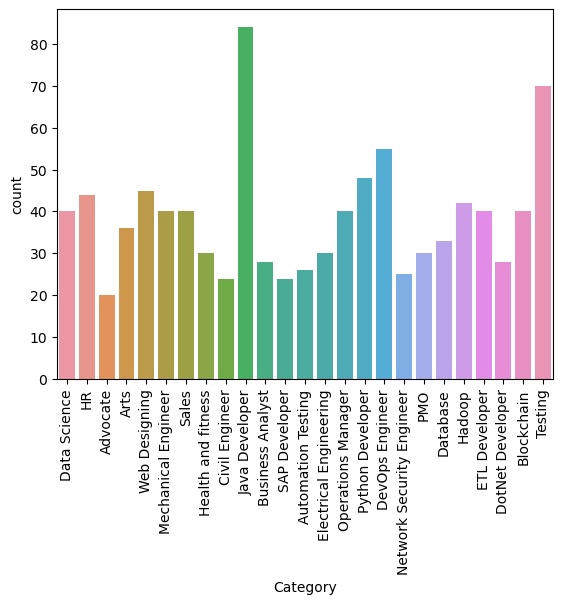

In [10]:
sns.countplot(data=df, x='Category')
plt.xticks(rotation=90)
plt.show()

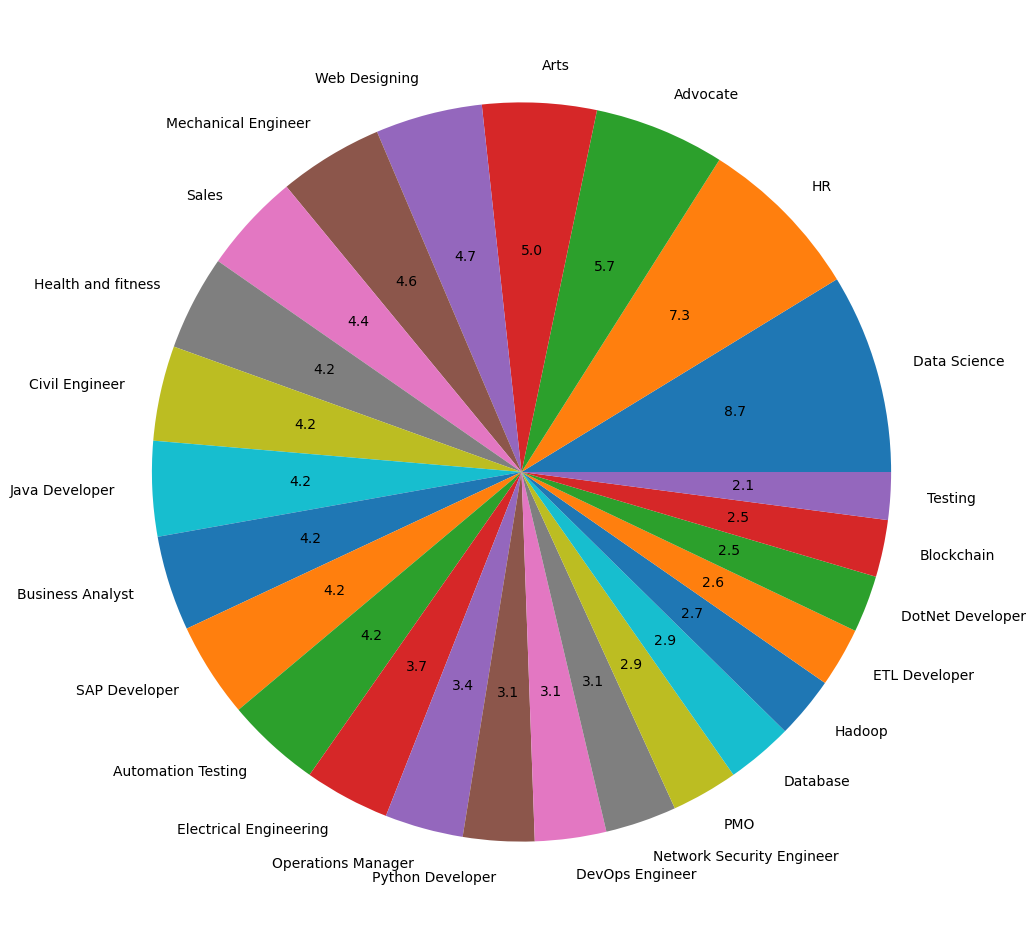

In [11]:
plt.figure(figsize=(15,12))
plt.pie(df['Category'].value_counts(),labels=df['Category'].unique(),autopct="%0.1f")
plt.show()

# Exploring Resume

In [12]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [13]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# Cleaning Data:  
    1.URLs  
    2.hashtags  
    3.mentions  
    4.special letters  
    5.ponctuations

In [14]:
import re

In [15]:
def cleanResume(txt):
    cleanTxt = re.sub(r'http\S+', '', txt)
    cleanTxt = re.sub(r'#\w+', '', cleanTxt)
    cleanTxt = re.sub(r'@\w+', '', cleanTxt)
    cleanTxt = re.sub(r'[^a-zA-Z0-9\s]', '', cleanTxt)
    cleanTxt = re.sub(r'[^\w\s]', '', cleanTxt)

    
    return cleanTxt

In [16]:
cleanTxt="my ? éèàç@#€! the website @utilisateur is this http://helloworld and http access it #sayeb_lmarbout"

In [17]:
cleanResume(cleanTxt)

'my   the website  is this  and http access it '

In [18]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

# words into categorical values

In [19]:
from sklearn.preprocessing import LabelEncoder #pour encoder des étiquettes catégoriques en valeurs numériques
le = LabelEncoder()

In [20]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [21]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

# Vectorization

In [22]:
df['Resume'][0]

'Skills  Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery  Machine learning Regression SVM Nave Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA  Neural Nets  Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau  Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision  Open CV and understanding of Deep learningEducation Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate  Ernst  Young LLP\r\nSkill Details \r\nJAVASCRIPT Exprience  24 months\r\njQuery Exprience  24 months\r\nPython Exprience  24 monthsCompany Details \r\ncompany  Ernst  Young LLP\r\ndescription  Fraud Investigations and Dispute Services   Assurance\r\nTECHNOLOGY ASSISTED REVIEW\r\nTAR Te

# Vectorization

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')

In [24]:
# Conversion de la colonne 'Resume' en une liste de chaînes de texte
resume_list = df['Resume'].tolist()

requiredText = tfidf.fit_transform(resume_list).toarray()
requiredText

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Splitting

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test= train_test_split(requiredText,df['Category'],test_size=0.2,random_state=42)

In [33]:
X_train.shape

(769, 7894)

In [34]:
X_test.shape

(193, 7894)

# Train the model and print the classification report

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

clf= OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9844559585492227


# Prediction System

In [36]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [37]:
myresume = """
Nom: Jean Dupont
Adresse: 123 rue de la République, 75001 Paris
Téléphone: 01 23 45 67 89
E-mail: jean.dupont@example.com

Objectif professionnel:
Développeur logiciel passionné avec plus de 5 ans d'expérience dans le développement web et mobile. Compétences étendues en Java, Python, et JavaScript. Cherche à rejoindre une équipe dynamique pour contribuer à des projets innovants.

Expérience professionnelle:
- Développeur logiciel chez ABC Software (2018-présent)
  Conception et développement d'applications web et mobiles pour divers clients. Utilisation de technologies Java, Spring Boot, React, et React Native.
- Stagiaire développeur chez XYZ Tech (2017-2018)
  Participation au développement d'une plateforme de gestion des ressources humaines. Travail sur le back-end en Python et le front-end en AngularJS.

Formation:
- Master en Informatique, Université de Paris (2015-2017)
- Licence en Informatique, Université de Paris (2012-2015)

Compétences techniques:
- Langages de programmation: Java, Python, JavaScript, HTML, CSS
- Frameworks et outils: Spring Boot, React, React Native, AngularJS
- Bases de données: MySQL, PostgreSQL
- Autres: Git, Maven, Docker

Langues:
- Français (langue maternelle)
- Anglais (courant)
"""



In [38]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Java Developer
15
